In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
cd 'MyDrive/Colab Notebooks/데이콘 프로젝트/dacon-movie-forecast'

/content/drive/MyDrive/Colab Notebooks/데이콘 프로젝트/dacon-movie-forecast


# Import Libraries

In [18]:
import datetime
import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

plt.style.use('seaborn')
sns.set(font_scale=2.0)

from sklearn.ensemble import RandomForestRegressor

In [19]:
pd.set_option('display.float_format', '{:,.0f}'.format)

# Load Dataset

In [20]:
df_train = pd.read_csv('data/movies_train.csv')
df_test = pd.read_csv('data/movies_test.csv')

# Explore Dataset

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [22]:
df_train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,"1,161,602",2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,"220,775",4,343,4,6959083


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [24]:
df_test.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,"300,529",2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,"342,700",4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,"4,206,611",3,419,7


### 결측치 확인

In [25]:
df_train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [26]:
df_test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

- dir_prev_bfnum 외에는 결측치가 없어 수월하다. 다만, train 데이터의 dir_prev_bfnum은 결측치가 50%를 초과했으므로 추후 drop해야 할 것 같다.

### 모든 변수 상관분석

In [51]:
# git hub test

### title
- 제목

In [27]:
len(df_train['title'].unique())

600

> 영화 제목은 600개 데이터 포인트가 모두 달라서 drop해야 할 것 같다. 단, 제목에 포함된 단어만으로 그룹핑을 하거나 제목의 길이에 따른 관객 수 차이가 있는지?

In [28]:
# 영화 제목 길이와 관객 수 간의 상관관계 확인해보기

result = []
for i in range(0, 600):
    word_length = len(df_train['title'][i])
    result.append(word_length)

result

[6,
 4,
 9,
 8,
 4,
 14,
 4,
 3,
 15,
 5,
 6,
 5,
 2,
 1,
 7,
 6,
 2,
 8,
 2,
 3,
 9,
 11,
 2,
 6,
 6,
 2,
 6,
 17,
 3,
 16,
 6,
 4,
 6,
 7,
 6,
 8,
 6,
 3,
 8,
 4,
 8,
 5,
 6,
 17,
 4,
 8,
 5,
 7,
 3,
 26,
 2,
 3,
 24,
 12,
 2,
 7,
 3,
 7,
 7,
 4,
 27,
 4,
 4,
 2,
 11,
 4,
 3,
 10,
 20,
 7,
 8,
 9,
 6,
 17,
 3,
 13,
 7,
 3,
 7,
 5,
 2,
 6,
 2,
 4,
 5,
 6,
 3,
 4,
 13,
 3,
 4,
 3,
 18,
 7,
 6,
 2,
 3,
 3,
 6,
 8,
 3,
 2,
 2,
 7,
 3,
 2,
 1,
 9,
 5,
 5,
 3,
 2,
 18,
 8,
 3,
 4,
 6,
 14,
 7,
 4,
 8,
 3,
 3,
 10,
 2,
 17,
 7,
 6,
 17,
 3,
 20,
 3,
 6,
 2,
 4,
 7,
 8,
 6,
 2,
 3,
 5,
 15,
 6,
 2,
 12,
 5,
 2,
 5,
 5,
 1,
 7,
 14,
 2,
 6,
 11,
 4,
 7,
 2,
 5,
 22,
 4,
 5,
 2,
 8,
 11,
 5,
 3,
 9,
 2,
 6,
 4,
 16,
 2,
 8,
 9,
 9,
 8,
 3,
 16,
 3,
 10,
 4,
 2,
 17,
 4,
 4,
 3,
 8,
 12,
 3,
 6,
 21,
 4,
 4,
 4,
 12,
 8,
 2,
 15,
 9,
 4,
 7,
 8,
 8,
 19,
 8,
 8,
 15,
 2,
 2,
 4,
 9,
 5,
 4,
 4,
 9,
 6,
 2,
 6,
 8,
 3,
 2,
 2,
 3,
 10,
 4,
 7,
 8,
 2,
 9,
 6,
 13,
 8,
 11,
 4,
 9,
 7,
 2,
 5,
 1

In [29]:
df_train['title_length'] = result
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,title_length
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,6
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,"1,161,602",2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,"220,775",4,343,4,6959083,9
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,"23,894",2,20,6,217866,8
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,1,251,2,483387,4


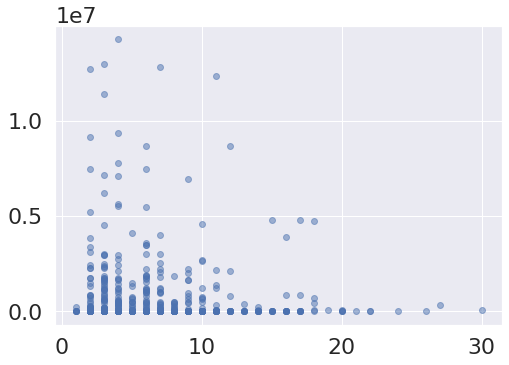

In [30]:
plt.scatter(x=df_train['title_length'], y=df_train['box_off_num'], alpha=0.5)

In [32]:
# 상관분석 결과 -0.08로 아무런 의미가 없다는 것을 알 수 있다.
title_box_corr = df_train[['title_length','box_off_num']].corr(method='pearson')
title_box_corr

,title_length,box_off_num
title_length,1,-0
box_off_num,-0,1


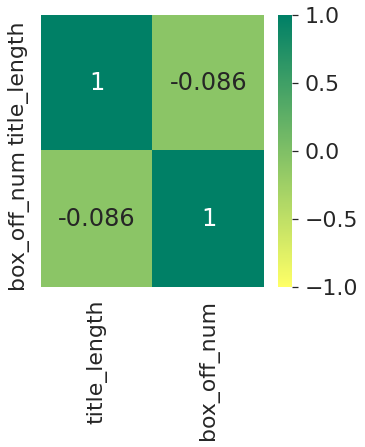

In [33]:
# 그래도 굳이 시각화를 해 보자면..
f, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.heatmap(title_box_corr,
           annot = True,
           cmap = 'summer_r', 
           vmin = -1, vmax=1)

- 영화 제목은 문장이 아니기 때문에 감성 분석을 해도 의미가 없을 것 같다. 결론은 Drop

### distributor
- 배급사

In [34]:
# unique를 찍어보면 역시나 엄청 많다
df_train['distributor'].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [35]:
len(df_train['distributor'].unique())

169

- 배급사는 169개가 있으므로, title과 달리 배급사와 영화는 일대다 관계인 것이다.
- 즉, 어떤 배급사에서는 많은 영화를 배급했을 것이고, 이는 배급사의 영향력, 회사 규모와 관련이 있을 것이다.
- 배급한 영화 수가 많은 경우 해당 영화의 영화관을 더 많이 확보했을 가능성이 높으므로, 관객 수와 비례 관계가 있을 것으로 가정할 수 있겠다.

In [36]:
# 배급사별 영화 수 확인
df_train.groupby('distributor')['box_off_num'].sum().sort_values(ascending=False)

distributor
CJ 엔터테인먼트          116788093
(주)쇼박스              88053064
(주)NEW              65532145
롯데엔터테인먼트            64383745
CJ E&M Pictures      8244674
                     ...    
나우콘텐츠                     54
위드시네마                     46
사람과 사람들                   42
고구마공작소                     8
인피니티엔터테인먼트                 2
Name: box_off_num, Length: 169, dtype: int64

In [37]:
df_train_distributor = pd.DataFrame(df_train.groupby('distributor')['box_off_num'].sum().sort_values(ascending=False))
df_train_distributor

,box_off_num
distributor,
CJ 엔터테인먼트,116788093
(주)쇼박스,88053064
(주)NEW,65532145
롯데엔터테인먼트,64383745
CJ E&M Pictures,8244674
...,...
나우콘텐츠,54
위드시네마,46
사람과 사람들,42


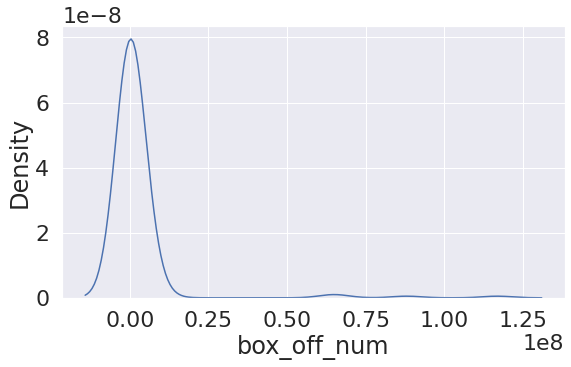

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train_distributor['box_off_num'], ax=ax)

plt.show()

- 대략 25% 이내에 몰려 있는 것 같다

In [39]:
df_train_distributor.describe()

,box_off_num
count,169
mean,"2,514,255"
std,"13,178,943"
min,2
25%,"1,351"
50%,"10,795"
75%,"126,416"
max,"116,788,093"


In [40]:
df_train_distributor.iloc[0:30]

,box_off_num
distributor,
CJ 엔터테인먼트,116788093
(주)쇼박스,88053064
(주)NEW,65532145
롯데엔터테인먼트,64383745
CJ E&M Pictures,8244674
NEW,8152133
CJ E&M 영화부문,7515928
CGV아트하우스,6590943
시네마서비스,5381059


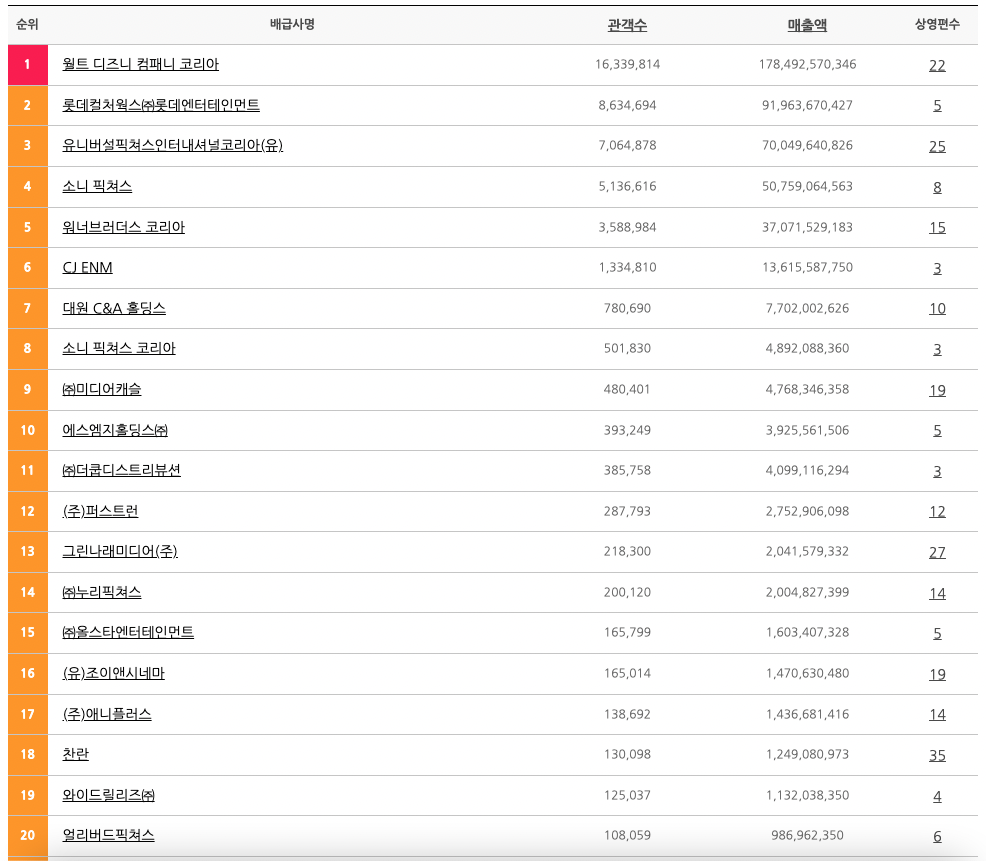

In [41]:
# 국내 배급사 매출 순위와 일치하는지 확인해보자
# http://www.cine21.com/rank/boxoffice/company/?cs_type=distributor
# 씨네21에서 2022-12-22 기준 1년 MAT로 확인해 본 배급사 순위는 아래와 같다.
Image('distributor_ranking_22-12.png')

- 데이터에서는 CJ엔터테인먼트, 쇼박스, NEW, 롯데엔터테인먼트가 역시 압도적인데, 실제 최근 순위와는 조금 차이가 있긴 하다.
- 아무튼 전처리 시에는 상위 4개, 100만~1000만 사이, 100만 미만 정도로 구분하면 되겠다.

### genre
- 장르
- 장르는 취향의 차이이므로 관객 수와의 상관관계는 낮을 것으로 생각된다.
- 다만, 액션이나 드라마 같은 장르는 비교적 대중적이므로 스릴러와 같은 장르에 비해서는 더 인기가 있을 것으로 생각된다.

In [42]:
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,title_length
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,6
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,"1,161,602",2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,"220,775",4,343,4,6959083,9
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,"23,894",2,20,6,217866,8
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,1,251,2,483387,4


In [43]:
df_train['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

- 대략 다 다른 것 같아 보이긴 한다만, 공포, 서스펜스 같은 장르는 비슷해서 묶을 수 있을 것 같다.
- 일단 데이터 포인트 갯수를 확인해 보자.

In [44]:
df_train['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

- 미스터리, SF, 뮤지컬, 서스펜스는 데이터 갯수가 적다.
- 액션과 느와르는 같이 묶어도 될 것 같다.
- 영화라는 예술 관점에서 봤을 때는 모든 장르가 하나하나 뚜렷한 특색을 가진다. 하지만 우리가 예측하려는 label은 '영화 관객 수'인데, 관객들은 영화를 볼 때 그렇게까지 세분화해서 장르를 구분하지 않을 것 같다. 영화를 보러 가는 이유와 TPO를 고려하여 비슷한 것끼리 묶어도 될 것 같다. 물론, 모두 다르게 했을 때와 묶었을 때 점수를 확인해봐야 하겠다.

### release_time
- 개봉일
- 영화 흥행에 개봉 일정은 매우 중요한 요소이다. 이 데이터에서 개봉일이 어떤 계절성을 가지는지 알아보자.

In [45]:
df_train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,title_length
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,6
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,"1,161,602",2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,"220,775",4,343,4,6959083,9


In [46]:
df_train_time = df_train[['release_time','box_off_num']]
df_train_time = df_train_time.set_index('release_time')
df_train_time

,box_off_num
release_time,
2012-11-22,23398
2015-11-19,7072501
2013-06-05,6959083
2012-07-12,217866
2010-11-04,483387
...,...
2014-08-13,1475091
2013-03-14,1716438
2010-09-30,2475


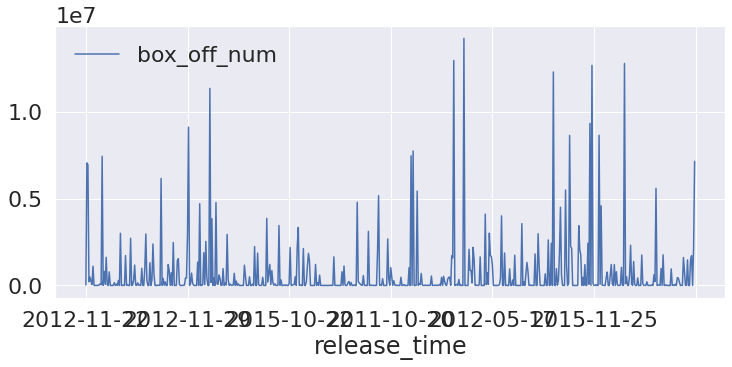

In [47]:
df_train_time.plot(figsize=(12, 5))

In [48]:
################ 날짜 index sort_values 어떻게 하는지?

- 이렇게 일자별로 보니 알 수가 없다. 월별로 묶어 보자

In [49]:
# 월별로 묶고 전체 연도로 보기

In [ ]:
# 연도별로 시각화 데이터를 12, 13, 14, 15년도 4개 그려서 서로 계절성을 비교해 보기

### time
- 상영시간 (분)

### screening_rat
- 상영등급

### director
- 감독 이름

### dir_prev_bfnum
- 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수 (단 관객수가 알려지지 않은 영화 제외)

### dir_prev_num
- 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수 (단 관객수가 알려지지 않은 영화 제외)

### num_staff
- 스태프 수

### num_actor
- 주연 배우 수

### box_off_num
- Label, 관객 수

### 상관 분석

# Preprocessing

### Missing Values

### One Hot Encoding

# Modeling

# Prediction

In [ ]:
prediction = model.predict(test)

In [ ]:
# score

# Submission

In [ ]:
submission = pd.read_csv('data/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
# submission['box_off_num'] = prediction
# submission

In [ ]:
# timestr = time.strftime("%Y%m%d")

'20221221'

In [ ]:
# submission.to_csv('.csv',index = False)

In [ ]:
bb

Github Push

In [52]:
!git config --global user.email "kyj8028@hotmail.com"
!git config --global user.name "YoungjaeKang"